In [11]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = scipy.io.loadmat('data/lwr/rho_bellshape_10grid_DS10_gn_eps005_solver2_ring.mat')

t = data['t'].flatten()[:,None]# 960 by 1
x = data['x'].flatten()[:,None]# 240 by 1
Exact_rho = np.real(data['rho']).T

In [3]:
def Ueq(rho):
    rho_max=1
    u_max = 1
    u = u_max * (1 - rho/rho_max)
    return rho * u

In [4]:
Exact_q = Ueq(Exact_rho)

In [6]:
rho_t = (Exact_rho[1:, :-1] - Exact_rho[:1, :-1]) / (3/960)
rho_t = rho_t[:,:-1]
print(rho_t.shape)

(959, 239)


In [8]:
rho_x = (Exact_rho[:, 1:-1] - Exact_rho[:, :-2]) / (1/240)
rho_x = rho_x[:-1,:]
print(rho_x.shape)

(959, 239)


In [10]:
q_x = (Exact_q[:, 1:-1] - Exact_q[:, :-2]) / (1/240)
q_x = q_x[:-1,:]
print(rho_x.shape)

(959, 239)


(array([ 4760.,  9616.,  7911.,  6939.,  8244.,  9740., 14440., 64676.,
        76219., 26656.]),
 array([-287.79212136, -247.3429633 , -206.89380524, -166.44464717,
        -125.99548911,  -85.54633105,  -45.09717299,   -4.64801492,
          35.80114314,   76.2503012 ,  116.69945926]),
 <a list of 10 Patch objects>)

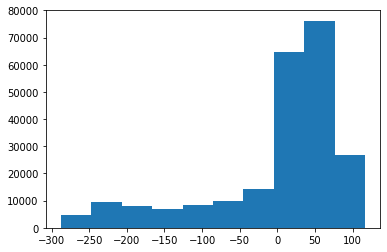

In [13]:
plt.hist((rho_t + q_x).flatten())